# Pair Trading Strategy Applied To Stock Market
### _IMPORTANT: This porject is 100% done by Max Hong Ka Ho. The results including code and backtest results are just for academic purpose and should not be treated as investment advice to any individuals_
### This is a project that I try to implement the Pair Trading Strategy to the Apple Stock (AAPL) and Microsoft(MSFT) to see how the performace is.

# What is Pair Trading:
### Pair Trading is a statistical arbitrage strategy in algorithmic trading which is a low risk strategy. It would search for 2 or more stocks with similar stock trend(they move up and down closely together with each other). Those stocks should fulfil some requirements like they should come from the same industry, etc. That's why, we choose Apple and Microsoft because they come from the technology industry.
### would inspect that the stock prices spread(difference between the standardized price of two stocks) would move in a certain volatility. When the spread is too large, their price spread would eventually converge in the long run. Therefore, when the positive price spread is greater than certain range, we would buy the sell the first stock and buy the second stock since we believe the first stock which are in strong position would converge to move together with the weaker second stock. Eventually, when we observe that the price spread converge would offset our stock shares and wait for another opportunity to gain money. The opposite is similar.

# The Methodology I Use in This Project
### __Minimum Distance Approach__
### Notation:$P^i_t$ denoting the price of stock i at time t
### Formula:
$\hat{P}^i_t = P^i_t / P^i_0$
### Return of stock i at time t
$r^i_t = (P^i_t - P^i_{t-1})/P^i_{t-1}$
### Square of standardized price difference
$SSD_{X,Y} = \sum_{t=1}^T(\hat{P}^X_t - \hat{P}^Y_t)^2$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#Import the apple stock data
one = pd.read_csv('AAPL.csv', index_col = 'Date').dropna()
one.index = pd.to_datetime(one.index)
one['ROI'] = one['Close'].pct_change()
one = one.dropna()
one.head()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2017-01-18,120.000000,120.500000,119.709999,119.989998,114.041977,23713000,-0.000083
2017-01-19,119.400002,120.089996,119.370003,119.779999,113.842407,25597300,-0.001750
2017-01-20,120.449997,120.449997,119.730003,120.000000,114.051498,32597900,0.001837
2017-01-23,120.000000,120.809998,119.769997,120.080002,114.127533,22050200,0.000667
2017-01-24,119.550003,120.099998,119.500000,119.970001,114.022987,23211000,-0.000916


In [3]:
#look at the end of the apple
one.tail()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2019-01-10,152.500000,153.970001,150.860001,153.800003,150.756531,35780700,0.003196
2019-01-11,152.880005,153.699997,151.509995,152.289993,149.276382,27023200,-0.009818
2019-01-14,150.850006,151.270004,149.220001,150.000000,147.031708,32439200,-0.015037
2019-01-15,150.270004,153.389999,150.050003,153.070007,150.040970,28710900,0.020467
2019-01-16,153.080002,155.880005,153.000000,154.940002,151.873962,30569700,0.012217


In [4]:
#Import the amazon stock data
two = pd.read_csv("MSFT.csv", index_col = 'Date').dropna()
two.index = pd.to_datetime(two.index)
two['ROI'] = two['Close'].pct_change()
two = two.dropna()
two.head()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2017-01-18,62.669998,62.700001,62.119999,62.500000,58.893673,19670100,-0.000480
2017-01-19,62.240002,62.980000,62.200001,62.299999,58.705212,18451700,-0.003200
2017-01-20,62.669998,62.820000,62.369999,62.740002,59.119820,30213500,0.007063
2017-01-23,62.700001,63.119999,62.570000,62.959999,59.327137,23097600,0.003506
2017-01-24,63.200001,63.740002,62.939999,63.520000,59.854824,24672900,0.008895


In [5]:
#pair the formation period
formstart = '2017-01-01'
formend = '2018-01-01'
onef = one[formstart:formend]
twof = two[formstart:formend]
onef.head()

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2017-01-18,120.000000,120.500000,119.709999,119.989998,114.041977,23713000,-0.000083
2017-01-19,119.400002,120.089996,119.370003,119.779999,113.842407,25597300,-0.001750
2017-01-20,120.449997,120.449997,119.730003,120.000000,114.051498,32597900,0.001837
2017-01-23,120.000000,120.809998,119.769997,120.080002,114.127533,22050200,0.000667
2017-01-24,119.550003,120.099998,119.500000,119.970001,114.022987,23211000,-0.000916


In [6]:
#concat two df into one df
pairf = pd.concat([onef['Close'], twof['Close']], axis = 1)
pairf.columns = ['AAPL', 'MSFT']
pairf

,AAPL,MSFT
Date,,
2017-01-18,119.989998,62.500000
2017-01-19,119.779999,62.299999
2017-01-20,120.000000,62.740002
2017-01-23,120.080002,62.959999
2017-01-24,119.970001,63.520000
...,...,...
2017-12-22,175.009995,85.510002
2017-12-26,170.570007,85.400002
2017-12-27,170.600006,85.709999


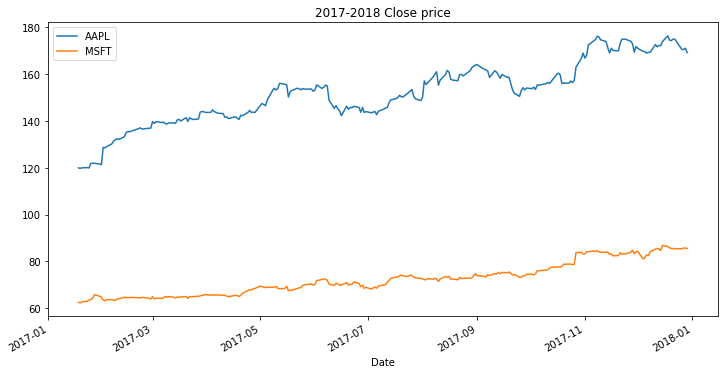

In [7]:
pairf.plot(title = '2017-2018 Close price', figsize = (12, 6))

In [8]:
#sum of squared difference
def SSD(priceX, priceY):
    if priceX is None or priceY is None:
        print("Invalid data")
    StandardX = priceX / priceX[0]
    StandardY = priceY / priceY[0]
    SSD = sum((StandardX - StandardY) ** 2)
    return SSD

In [9]:
pairf

,AAPL,MSFT
Date,,
2017-01-18,119.989998,62.500000
2017-01-19,119.779999,62.299999
2017-01-20,120.000000,62.740002
2017-01-23,120.080002,62.959999
2017-01-24,119.970001,63.520000
...,...,...
2017-12-22,175.009995,85.510002
2017-12-26,170.570007,85.400002
2017-12-27,170.600006,85.709999


In [10]:
# ensure no error values
one.isnull().sum()
two.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
ROI          0
dtype: int64

In [11]:
#take a look on their SSD
dis = SSD(pairf['AAPL'], pairf['MSFT'])
dis

3.295550699413776

# Cointegration Model
## This method is about choosing the stocks with cointegration relation
3 requirements for the model


1.$log(P^X_t)$ is not stationary

2.If $log(P^X_t) - log(P^X_{t-1})$ is stationary, then $log(P^X_t)$ is integrated of first order

3.$r_t$ is stationary


Reason:


$log(P^X_t) - log(P^X_{t-1}) = log(P^X_t/P^X_{t-1})$

Therefore:
$r^X_t = (P^X_t - P^X_{t-1})/P^X_{t-1} = P^X_t/P^X_{t-1} - 1 $

$log(P^X_t) - log(P^X_{t-1}) = log(P^X_t/P^X_{t-1}) = log(1 + r^X_t) \approx r^X_t$

### Our first task is to check if the 2 stocks are integrated of first order

In [12]:
from arch.unitroot import ADF
import numpy as np

In [13]:
#test if one is integrated of order one
oneflog = np.log(pairf['AAPL'])
twoflog = np.log(pairf['MSFT'])
adfa = ADF(oneflog)
print(adfa.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.398
P-value                         0.142
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### AAPL is not stationary, so first condition is fulfilled

In [14]:
#find the difference in log of AAPL
reta = oneflog.diff()[1:]
adfreta = ADF(reta)
print(adfreta.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.163
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### AAPL log price difference is stationary, so second condition is fulfilled

In [15]:
#for the AMZN stock
adfb = ADF(twoflog)
print(adfb.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.393
P-value                         0.911
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### MSFT is stationary, so first condition is NOT fulfilled. Therefore, the Cointegration Method may not give a robus result but we can still have a try

In [16]:
retb = twoflog.diff()[1:]
adfretb = ADF(retb)
print(adfretb.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -16.780
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### MSFT log price difference is stationary, so second condition is fulfilled

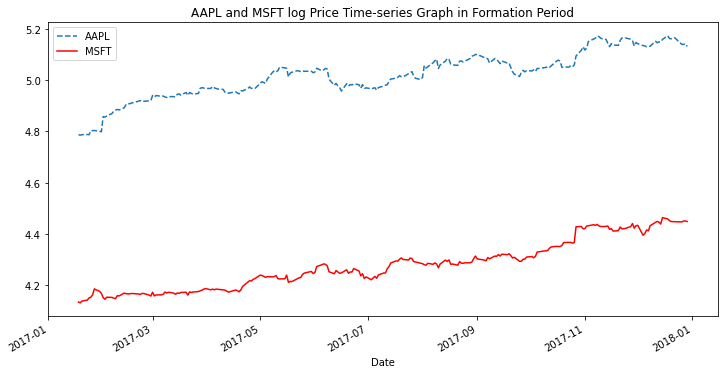

In [95]:
oneflog.plot(label = "AAPL", style = '--', figsize = (12, 6))
twoflog.plot(label = 'MSFT', style = 'r-')
plt.legend(loc = 'upper left')
plt.title("AAPL and MSFT log Price Time-series Graph in Formation Period")
plt.show()

C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


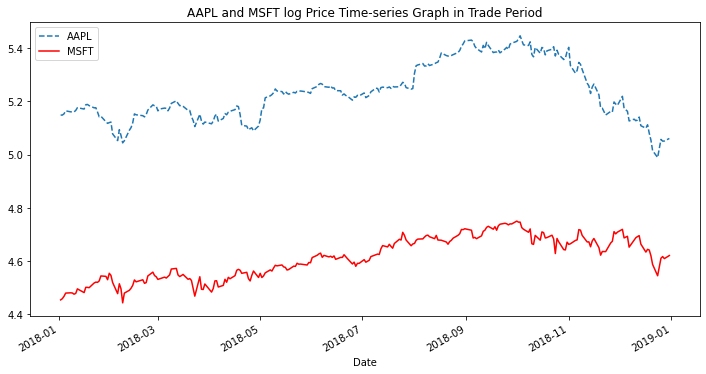

In [98]:
oneflogt = np.log(one[tradestart:tradeend])
twoflogt = np.log(two[tradestart:tradeend])
oneflogt['Close'].plot(label = "AAPL", style = '--', figsize = (12, 6))
twoflogt['Close'].plot(label = 'MSFT', style = 'r-')
plt.legend(loc = 'upper left')
plt.title("AAPL and MSFT log Price Time-series Graph in Trade Period")
plt.show()

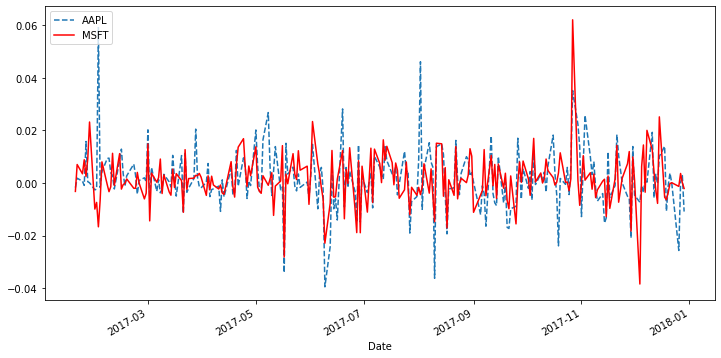

In [18]:
#plot the log price difference graph
reta.plot(label = 'AAPL', style = '--', figsize = (12, 6))
retb.plot(label = 'MSFT', style = 'r-')
plt.legend(loc = 'upper left')

### We can discern the pattern that the log price difference graph is oscillating at 0

### Under the assumption that $log(P^X_t)$ and $log(P^X_{t-1})$ are integrated of degree one, we then use the OLS estimator to construct the following:

$log(P^{Y}_t) = \alpha + \beta*log(P^{X}_t + \epsilon_t)$

Then check if {$\epsilon_t$} is stationary. If yes, then $log(P^{Y}_t)$ and $log(P^{X}_t)$ are cointegrated

In [19]:
import statsmodels.api as sm
model = sm.OLS(oneflog, sm.add_constant(twoflog))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1132.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           1.25e-92
Time:                        20:10:12   Log-Likelihood:                 451.73
No. Observations:                 241   AIC:                            -899.5
Df Residuals:                     239   BIC:                            -892.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3010      0.111     11.769      0.0

In [20]:
#take the coefficients
alpha = result.params[0]
beta = result.params[1]

In [21]:
#find the residual
spread = oneflog - (alpha + beta * twoflog)
spread.head()

Date
2017-01-18   -0.108160
2017-01-19   -0.107126
2017-01-20   -0.111409
2017-01-23   -0.113785
2017-01-24   -0.122399
dtype: float64

Text(0.5, 1.0, 'AAPL and MSFT residual plot')

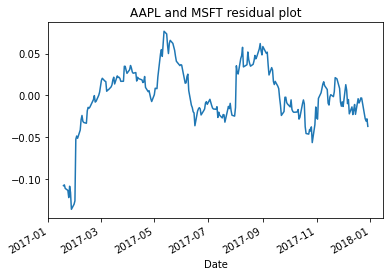

In [22]:
#plot the spread of two stocks
spread.plot()
plt.title("AAPL and MSFT residual plot")

In [23]:
#mean of the spread
spread.mean()

1.4807887511846902e-14

In [24]:
#test whether residual is stationary
adfspread = ADF(spread, trend = 'nc')
print(adfspread.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.587
P-value                         0.000
Lags                                9
-------------------------------------

Trend: No Trend
Critical Values: -2.58 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


C:\Users\Hp User\Anaconda3\lib\site-packages\arch\unitroot\unitroot.py:466: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  FutureWarning,


### The P-value is 0.000 < 0.05, so the test should that $\epsilon_t$ is stationary significantly and we can conclude that AAPL and AMZN are cointegrated.

## Setting up the Cointegration strategy

### 1. Find the mean of SSD and std of SSD

In [25]:
#Minimum distance method
#standardized price of one
standarda = onef['Close'] / onef['Close'][0]

In [26]:
#standardized price of 2
standardb = twof['Close'] / twof['Close'][0]
#ssd of the price time series
ssd_pair = standarda - standardb
ssd_pair.head()

Date
2017-01-18    0.000000
2017-01-19    0.001450
2017-01-20   -0.003757
2017-01-23   -0.006610
2017-01-24   -0.016487
Name: Close, dtype: float64

In [27]:
#mean of ssd
meanssd = np.mean(ssd_pair)
meanssd

0.10790164258763589

In [28]:
sdssd_pair = np.std(ssd_pair)
sdssd_pair

0.045074602126061625

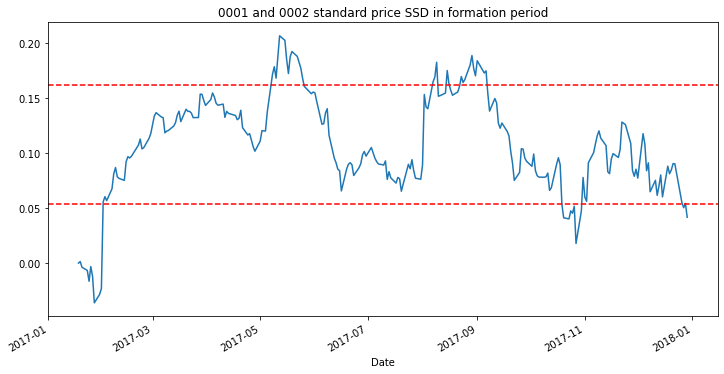

In [29]:
thresholdup = meanssd + 1.2 * sdssd_pair
thresholddown = meanssd - 1.2 * sdssd_pair
plt.figure(figsize = (12, 6))
ssd_pair.plot()
plt.title("0001 and 0002 standard price SSD in formation period")
plt.axhline(y = thresholdup, color = 'r', ls = '--')
plt.axhline(y = thresholddown, color = 'r', ls = '--')


### 2.Set the Trading Period
When price > $\mu + 1.2\sigma$, sell strong and buy weak

When price < $\mu - 1.2\sigma$, buy weak and sell strong

In [30]:
tradstart = '2018-01-01'
tradeend = '2019-01-01'
onet = one[tradstart:tradeend]['Close']
twot = two[tradstart:tradeend]['Close']
def spreadcal(pricex, pricey):
    data = pd.concat([pricex, pricey], axis = 1).dropna()
    data.columns = ['X', 'Y']
    standardx = data['X'] / data['X'][0]
    standardy = data['Y'] / data['Y'][0]
    spread = standardx - standardy
    return(spread)

In [31]:
tradspread = spreadcal(onet, twot)
tradspread.describe()

count    251.000000
mean      -0.078008
std        0.074598
min       -0.287454
25%       -0.106481
50%       -0.066789
75%       -0.032810
max        0.058176
dtype: float64

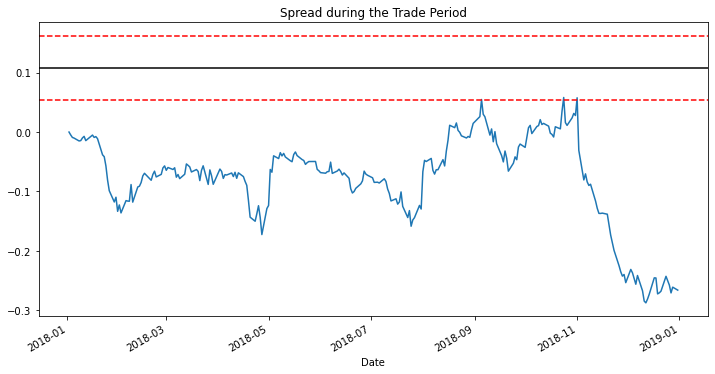

In [32]:
#plot the spread time series graph
tradspread.plot(figsize = (12, 6))
plt.title("Spread during the Trade Period")
plt.axhline(y = meanssd, color = 'black')
plt.axhline(y = thresholdup, color = 'red', ls = '--')
plt.axhline(y = thresholddown, color = 'red', ls = '--')



### 3. Test the Cointegration Model

In [33]:
spreadf = oneflog - (alpha + beta * twoflog)
mu = np.mean(spreadf)
sd = np.std(spreadf)
mu + 1.2*sd

0.04455569146078932

In [34]:
mu - 1.2 * sd

-0.0445556914607597

In [35]:
cospreadt = np.log(onet) - (alpha + beta * np.log(twot))
cospreadt.describe()

count    251.000000
mean      -0.074162
std        0.069862
min       -0.273119
25%       -0.101100
50%       -0.069751
75%       -0.028796
max        0.049539
Name: Close, dtype: float64

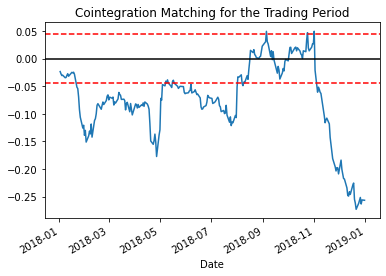

In [36]:
cospreadt.plot()
plt.title("Cointegration Matching for the Trading Period")
plt.axhline(y = mu, color = 'black')
plt.axhline(y = mu + 1.2 * sd, color = 'red', ls= '--')
plt.axhline(y = mu - 1.2 * sd, color = 'red', ls = '--')

## Construct the Pair Trading Class

In [37]:
import pandas as pd
import numpy as np
from arch.unitroot import ADF
import statsmodels.api as sm
class PairTrading:
    def SSD(self, pricex, pricey):
        if pricex is None or pricey is None:
            print("Lack of Time Series")
        standardx = pricex / pricex[0]
        standardy = pricey / pricey[0]
        ssd = np.sum((standardy - standardx) ** 2)
        return(ssd)
    def ssdspread(self, pricex, pricey):
        if pricex is None or pricey is None:
            print("Lack of Time Series")
        data = pd.concat([pricex, pricey], axis = 1).dropna()
        data.columns = ['X', 'Y']
        standardx = data['X'] / data['X'][0]
        standardy = data['Y'] / data['Y'][0]
        spread = standardx - standardy
        return(spread)
    def cointegration(self, pricex, pricey):
        if pricex is None or pricey is None:
            print("Lack of Time Series")
        pricex = np.log(pricex)
        pricey = np.log(pricey)
        results = sm.OLS(pricey, sm.add_constant(pricex)).fit()
        resid = results.resid
        adfspread = ADF(resid)
        if adfspread.pvalue >= 0.1:
            print('''Stock price is not of cointegration
            P-value of ADF test: %f
            Coefficients of the regression:
            Intercept: %f
            beta: %f
            ''' %(adfspread.pvalue, results.params[0], results.params[1]))
            return(None)
        else:
            print('''Stock Price are cointegrable.
            P-value of ADF test: %f
            Coefficients of the regression:
            Intercept: %f
            beta: %f
            ''' %(adfspread.pvalue, results.params[0], results.params[1]))
            return(results.params[0], results.params[1])
    def cointegrationspread(self, pricex, pricey, formstart, formend, tradestard, tradeend):
        if pricex is None or pricey is None:
            print("Lack of Time Series")
        formx = pricex[formstart:formend]
        formy = pricey[formstart:formend]
        tradex = pricex[tradestard: tradeend]
        tradey = pricey[tradestard: tradeend]
        coefficients = self.cointegration(formx, formy)
        if coefficients is None:
            print("Can't form cointegration, can't be paired to trade")
        else:
            spread = np.log(tradey) - (coefficients[0] + coefficients[1] * np.log(tradex))
            return (spread)
    def calbound(self, pricex, pricey, method, formstart, formend, width = 1.5):
        formx = pricex[formstart:formend]
        formy = pricey[formstart:formend]
        if method == 'SSD':
            spread = self.ssdspread(formx, formy)
            mu = np.mean(spread)
            sd = np.std(spread)
            upperbound = mu + width * sd
            lowerbound = mu - width * sd
            return (upperbound, lowerbound)
        elif method == 'Cointegration':
            spread = self.cointegrationspread(formx, formy, formstart, formend, formstart, formend)
            mu = np.mean(spread)
            sd = np.std(spread)
            upperbound = mu + width * sd
            lowerbound = mu - width * sd
            return(upperbound, lowerbound)
        else:
            print("Method doesn't exist, please choose between 'SSD' and 'Cointegration'")

In [38]:
formstart = '2017-01-01'
formend = '2018-01-01'
tradestart = '2018-01-01'
tradeend = '2019-01-01'
pricea = one['Close']
priceb = two['Close']
priceaf = pricea[formstart:formend]
pricebf = priceb[formstart:formend]
pt = PairTrading()

In [39]:
ssd = pt.SSD(priceaf, pricebf)
ssd

3.295550699413776

In [40]:
ssdspread = pt.ssdspread(priceaf, pricebf)
ssdspread.describe()

count    241.000000
mean       0.107902
std        0.045168
min       -0.036145
25%        0.081437
50%        0.104113
75%        0.138347
max        0.206862
dtype: float64

In [41]:
ssdspread.head()

Date
2017-01-18    0.000000
2017-01-19    0.001450
2017-01-20   -0.003757
2017-01-23   -0.006610
2017-01-24   -0.016487
dtype: float64

In [42]:
coefficients = pt.cointegration(priceaf, pricebf)

Stock Price are cointegrable.
            P-value of ADF test: 0.078713
            Coefficients of the regression:
            Intercept: -0.490016
            beta: 0.949836
            


### We can't reject the null hypothesis that stocks are cointegrated at 5% level but we can reject the null at 10% level. However, we would still have a try on it

In [43]:
alpha, beta

(1.3009554527196956, 0.869278986297122)

In [44]:
cospreadf = pt.cointegrationspread(pricea, priceb, formstart, formend, formstart, formend)

Stock Price are cointegrable.
            P-value of ADF test: 0.078713
            Coefficients of the regression:
            Intercept: -0.490016
            beta: 0.949836
            


In [45]:
cospreadt = pt.cointegrationspread(pricea, priceb, formstart, formend, tradestart, tradeend)

Stock Price are cointegrable.
            P-value of ADF test: 0.078713
            Coefficients of the regression:
            Intercept: -0.490016
            beta: 0.949836
            


In [46]:
cospreadf.describe()

count    2.410000e+02
mean    -3.066243e-15
std      3.889283e-02
min     -8.204557e-02
25%     -3.398470e-02
50%      4.182074e-03
75%      2.638431e-02
max      1.136908e-01
Name: Close, dtype: float64

In [47]:
cospreadt.describe()

count    251.000000
mean       0.128829
std        0.064957
min        0.016500
25%        0.088782
50%        0.117472
75%        0.151167
max        0.313436
Name: Close, dtype: float64

In [48]:
bound = pt.calbound(pricea, priceb, 'Cointegration', formstart, formend, width = 1.2)

Stock Price are cointegrable.
            P-value of ADF test: 0.078713
            Coefficients of the regression:
            Intercept: -0.490016
            beta: 0.949836
            


## Real application of the Pair Trading

1. Use $\beta$ to indicate our proportion allocated to each stock
2. Set the trade and offset criterion


- when the spread increases above $\mu + 1.5\sigma$, sell AAPL and buy MSFT
- when the spread decreases below $\mu + 0.2\sigma$, but AAPL and sell MSFT
- when the spread decreases below $\mu - 1.5\sigma$, sell MSFT and buy AAPL
- when the spread increases above $\mu - 0.2\sigma$, sell AAPL and buy MSFT
- when the spread increases above $\mu + 2.5\sigma$, stop any trading since it indicates that the relationship has been broken
- when the spread decreases below $\mu - 2.5\sigma$, stop any trading since it indicates that the relationship has been broken

In [49]:
mu = np.mean(cospreadf)
sd = np.std(cospreadf)

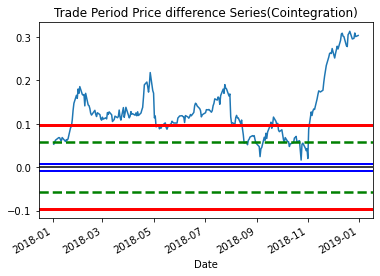

In [50]:
cospreadt.plot()
plt.title("Trade Period Price difference Series(Cointegration)")
plt.axhline(y = mu, color = 'black')
plt.axhline(y = mu + 0.2 * sd, color = 'blue', ls = '-', lw = 2)
plt.axhline(y = mu - 0.2 * sd, color = 'blue', ls = '-', lw = 2)
plt.axhline(y = mu + 1.5 * sd, color = 'green', ls = '--', lw = 2.5)
plt.axhline(y = mu - 1.5 * sd, color = 'green', ls = '--', lw = 2.5)
plt.axhline(y = mu + 2.5 * sd, color = 'red', ls = '-', lw = 3)
plt.axhline(y = mu - 2.5 * sd, color = 'red', ls = '-', lw = 3)
#

In [51]:
#construct the trade and offset interval
level = (float('-inf'), mu - 2.5 * sd, mu - 1.5* sd, mu - 0.2 * sd, mu + 0.2 * sd, mu + 1.5 * sd, mu + 2.5 * sd, float('inf'))
prclevel = pd.cut(cospreadt, level, labels = False) - 3
prclevel.head()

Date
2018-01-02    1
2018-01-03    1
2018-01-04    2
2018-01-05    2
2018-01-08    2
Name: Close, dtype: int64

In [55]:
#construct trading signal
def tradesig(prcLevel):
    n=len(prcLevel)
    signal=np.zeros(n)
    for i in range(1,n):
        if prcLevel[i-1]==1 and prcLevel[i]==2:
            signal[i]=-2
        elif prcLevel[i-1]==1 and prcLevel[i]==0:
            signal[i]=2
        elif prcLevel[i-1]==2 and prcLevel[i]==3:
            signal[i]=3
        elif prcLevel[i-1]==-1 and prcLevel[i]==-2:
            signal[i]=1
        elif prcLevel[i-1]==-1 and prcLevel[i]==0:
            signal[i]=-1
        elif prcLevel[i-1]==-2 and prcLevel[i]==-3:
            signal[i]=-3
    return(signal)
signal = tradesig(prclevel)

In [62]:
#record the trade
ns = len(signal)
position = [signal[0]]
for i in range(1, ns):
    position.append(position[-1])
    if signal[i] == 1: 
        position[i] = 1 #buy 1 and sell 2
    elif signal[i] == -2:
        position[i] = -1 #buy 2 and sell 1
    elif signal[i] == -1 and position[i - 1] == 1:
        position[i] = 0
    elif signal[i] == 2 and position[i - 1] == -1:
        position[i] = 0
    elif signal[i] == 3:
        position[i] = 0
    elif signal[i] == -3:
        position[i] = 0
    

In [63]:
position = pd.Series(position, index = cospreadt.index)
position.tail()

Date
2018-12-24    0.0
2018-12-26    0.0
2018-12-27    0.0
2018-12-28    0.0
2018-12-31    0.0
dtype: float64

In [89]:
#initial wealth = 10000,every time we buy 10 shares
def TradeSim(priceX,priceY,position):
    n=len(position)
    shareY=10000*position
    shareX=[(-beta)*shareY[0]*priceY[0]/priceX[0]]
    cash=[10000]
    for i in range(1,n):
        shareX.append(shareX[i-1])
        cash.append(cash[i-1])
        if position[i-1]==0 and position[i]==1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==0 and position[i]==-1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
        elif position[i-1]==-1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
    cash = pd.Series(cash,index=position.index)
    shareY=pd.Series(shareY,index=position.index)
    shareX=pd.Series(shareX,index=position.index)
    asset=cash+shareY*priceY+shareX*priceX
    account=pd.DataFrame({'Position':position,
                          'ShareY':shareY,
                          'ShareX':shareX,
                          'Cash':cash,
                          'Asset':asset})
    return(account)

    
            

In [90]:
onet

Date
2018-01-02    172.259995
2018-01-03    172.229996
2018-01-04    173.029999
2018-01-05    175.000000
2018-01-08    174.350006
                 ...    
2018-12-24    146.830002
2018-12-26    157.169998
2018-12-27    156.149994
2018-12-28    156.229996
2018-12-31    157.740005
Name: Close, Length: 251, dtype: float64

In [91]:
account1 = TradeSim(onet, twot, position)
account1.tail(50)

,Position,ShareY,ShareX,Cash,Asset
Date,,,,,
2018-10-18,-1.0,-10000.0,4343.460278,61794.677266,-84931.016016
2018-10-19,-1.0,-10000.0,4343.460278,61794.677266,-72241.097761
2018-10-22,-1.0,-10000.0,4343.460278,61794.677266,-76120.808362
2018-10-23,-1.0,-10000.0,4343.460278,61794.677266,-51786.412296
2018-10-24,-1.0,-10000.0,4343.460278,61794.677266,-27170.468823
2018-10-25,-1.0,-10000.0,4343.460278,61794.677266,-66512.770507
2018-10-26,-1.0,-10000.0,4343.460278,61794.677266,-68314.841482
2018-10-29,-1.0,-10000.0,4343.460278,61794.677266,-54849.271525
2018-10-30,-1.0,-10000.0,4343.460278,61794.677266,-49045.262317


## Plot my account

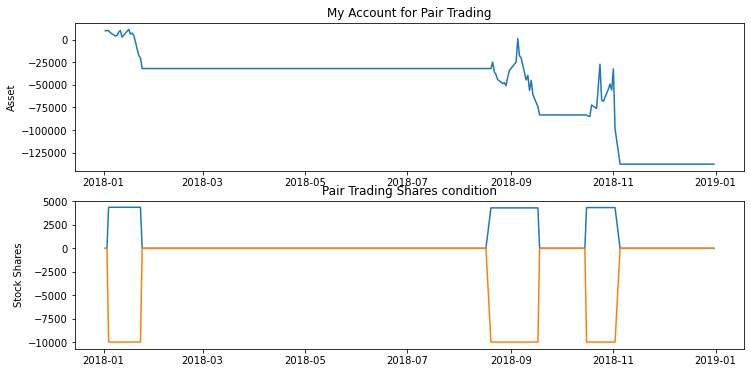

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.plot(account1['Asset'], label = 'Asset')
plt.title("My Account for Pair Trading")
plt.ylabel('Asset')
plt.subplot(212)
plt.plot(account1['ShareX'], label = 'First Stock')
plt.plot(account1['ShareY'], label = 'Second Stcok')
plt.ylabel('Stock Shares')
plt.title("Pair Trading Shares condition")
plt.show()

In [93]:
#The final wealth of trading period
final_wealth = account1['Asset'][-1]
final_wealth

-137707.20258164045

In [94]:
#return of pair trading
return_of_trade = (final_wealth - 10000) / 10000
return_of_trade

-14.770720258164046

### In conclusion, although AAPL and MSFT are both technology stocks, when we pair trade them, our profit is negative and even face 140% loss. AAPL and MSFT are not moving so closely that disable us to do statistical arbitrage on their price movements. One main reason is the failure of assumption of MSFT to meet the integration of first order. If the readers are interested, you are welcome to try out your own pair traded stocks. :)